# Intro
Name:  

    MAP_proposal_profiles

Purpose:  

    Python script for plotting AOD profile and extinctions for various places

Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - os
    - datetime
    - mpl_toolkits
    - plotting_utils (user defined plotting routines)
    - map_utils, dependent on geopy
    - Basemap
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, NASA Ames, 2016-06-08

# Import the required modules and do the setup

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
from mpltools import color
import numpy as np
import scipy.io as sio
import hdf5storage as hs
import math
import os
import Sp_parameters as Sp

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [7]:
import load_utils as lu
from load_utils import mat2py_time, toutc

In [16]:
from mpl_toolkits.basemap import Basemap,cm

In [3]:
# set the basic directory path
fp='C:\\Users\\sleblan2\\Research\\SEAC4RS\\'

# Load some required files

## Load some matlab files

### Load 4STAR data

In [4]:
star = sio.loadmat(fp+'dc8\\20130816\\20130816starsun_R2.mat',variable_names=('w','tau_aero','t','Alt','Lat','Lon'))

In [5]:
star['tt'] = mat2py_time(star['t'])
star['utc'] = toutc(star['tt'])

In [6]:
star_cl = sio.loadmat(fp+'starsun\\20130913starsun_R2_tauaero.mat',variable_names=('w','tau_aero','t','Alt','Lat','Lon'))

## Load some ict archived files

### 4STAR data

In [ ]:
istar_cld,istar_cldh = lu.load_ict(fp+'starsun_ict\\SEAC4RS-4STAR-AOD-CWV_DC8_20130913_R2.ict',return_header=True)

In [35]:
istar_cldh

['79, 1001\n',
 'Phil Russell\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'SEAC4RS\n',
 '1, 1\n',
 '2013, 09, 13, 2016, 02, 02\n',
 '1\n',
 'Start_UTC, UTC seconds, Elapsed seconds from 0 hours UT on day given by DATE\n',
 '42\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 '-9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999\n',
 'Latitude, deg, Aircraft latitude at the indicated time\n',
 'Longitude, deg, Aircraft longitude at the indicated time\n',
 'GPS_alt, m, Aircraft GPS geometric altitude at the indicated time\n',
 'qual_flag, unitless, quality of retrieved AOD: 0=good; 1=poor, due t

In [9]:
istar_bnd,istar_bndh = lu.load_ict(fp+'starsun_ict\\SEAC4RS-4STAR-AOD-CWV_DC8_20130816_R2.ict',return_header=True)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_alt', 'qual_flag', 'amass_aer', 'T4temp', 'CWV', 'std_CWV', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0675', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1559', 'UNCAOD1627')


In [38]:
istar_cld2,istar_cld2h = lu.load_ict(fp+'starsun_ict\\SEAC4RS-4STAR-AOD-CWV_DC8_20130823_R2.ict',return_header=True)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_alt', 'qual_flag', 'amass_aer', 'T4temp', 'CWV', 'std_CWV', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0675', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1559', 'UNCAOD1627')


In [222]:
istar_val,istar_valh = lu.load_ict(fp+'starsun_ict\\SEAC4RS-4STAR-AOD-CWV_DC8_20130806_R2.ict',return_header=True)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_alt', 'qual_flag', 'amass_aer', 'T4temp', 'CWV', 'std_CWV', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0675', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1559', 'UNCAOD1627')


### insitu data

In [11]:
iso2_cld,iso2_cldh = lu.load_ict(fp+'dc8\\SEAC4RS-GTCIMS-SO2_DC8_20130913_R1.ict',return_header=True)

('UTC_start', 'UTC_stop', 'UTC_mid', 'SO2_GTCIMS', 'HCl_GTCIMS', 'HNO4_GTCIMS')


In [12]:
iso2_bnd,iso2_bndh = lu.load_ict(fp+'dc8\\SEAC4RS-GTCIMS-SO2_DC8_20130816_R1.ict',return_header=True)

('UTC_start', 'UTC_stop', 'UTC_mid', 'SO2_GTCIMS', 'HCl_GTCIMS')


In [13]:
iams_bnd,iams_bndh = lu.load_ict(fp+'dc8\\SEAC4RS-AMS_DC8_20130816_R1.ict',return_header=True)

('AMS_Starttime', 'AMS_Stoptime', 'AMS_MidPointTime', 'OA_lt_1um_AMS', 'OA_lt_1um_AMS_prec', 'OA_lt_1um_AMS_DL', 'Sulfate_lt_1um_AMS', 'Sulfate_lt_1um_AMS_prec', 'Sulfate_lt_1um_AMS_DL', 'Nitrate_lt_1um_AMS', 'Nitrate_lt_1um_AMS_prec', 'Nitrate_lt_1um_AMS_DL', 'Ammonium_lt_1um_AMS', 'Ammonium_lt_1um_AMS_prec', 'Ammonium_lt_1um_AMS_DL', 'Chloride_lt_1um_AMS', 'Chloride_lt_1um_AMS_prec', 'Chloride_lt_1um_AMS_DL', 'StdtoVol_AMS', 'PM1InletCorr_AMS', 'IceFlag_AMS', 'O_C_lt_1um_AMS', 'H_C_lt_1um_AMS', 'OM_OC_lt_1um_AMS', 'f43_lt_1um_AMS', 'f44_lt_1um_AMS', 'f57_lt_1um_AMS', 'f60_lt_1um_AMS', 'AmmBalance_lt_1um_AMS', 'OrgNitr_Fraction_lt_1um_AMS')


In [14]:
iams_cld,iams_cldh = lu.load_ict(fp+'dc8\\SEAC4RS-AMS_DC8_20130913_R1.ict',return_header=True)

('AMS_Starttime', 'AMS_Stoptime', 'AMS_MidPointTime', 'OA_lt_1um_AMS', 'OA_lt_1um_AMS_prec', 'OA_lt_1um_AMS_DL', 'Sulfate_lt_1um_AMS', 'Sulfate_lt_1um_AMS_prec', 'Sulfate_lt_1um_AMS_DL', 'Nitrate_lt_1um_AMS', 'Nitrate_lt_1um_AMS_prec', 'Nitrate_lt_1um_AMS_DL', 'Ammonium_lt_1um_AMS', 'Ammonium_lt_1um_AMS_prec', 'Ammonium_lt_1um_AMS_DL', 'Chloride_lt_1um_AMS', 'Chloride_lt_1um_AMS_prec', 'Chloride_lt_1um_AMS_DL', 'StdtoVol_AMS', 'PM1InletCorr_AMS', 'IceFlag_AMS', 'O_C_lt_1um_AMS', 'H_C_lt_1um_AMS', 'OM_OC_lt_1um_AMS', 'f43_lt_1um_AMS', 'f44_lt_1um_AMS', 'f57_lt_1um_AMS', 'f60_lt_1um_AMS', 'OrgNitr_Fraction_lt_1um_AMS')


In [220]:
iso2_cld,iso2_cldh = lu.load_ict(fp+'dc8\\SEAC4RS-GTCIMS-SO2_DC8_20130823_R1.ict',return_header=True)

('UTC_start', 'UTC_stop', 'UTC_mid', 'SO2_GTCIMS', 'HCl_GTCIMS')


In [221]:
iams_cld,iams_cldh = lu.load_ict(fp+'dc8\\SEAC4RS-AMS_DC8_20130823_R1.ict',return_header=True)

('AMS_Starttime', 'AMS_Stoptime', 'AMS_MidPointTime', 'OA_lt_1um_AMS', 'OA_lt_1um_AMS_prec', 'OA_lt_1um_AMS_DL', 'Sulfate_lt_1um_AMS', 'Sulfate_lt_1um_AMS_prec', 'Sulfate_lt_1um_AMS_DL', 'Nitrate_lt_1um_AMS', 'Nitrate_lt_1um_AMS_prec', 'Nitrate_lt_1um_AMS_DL', 'Ammonium_lt_1um_AMS', 'Ammonium_lt_1um_AMS_prec', 'Ammonium_lt_1um_AMS_DL', 'Chloride_lt_1um_AMS', 'Chloride_lt_1um_AMS_prec', 'Chloride_lt_1um_AMS_DL', 'StdtoVol_AMS', 'PM1InletCorr_AMS', 'IceFlag_AMS', 'O_C_lt_1um_AMS', 'H_C_lt_1um_AMS', 'OM_OC_lt_1um_AMS', 'f43_lt_1um_AMS', 'f44_lt_1um_AMS', 'f57_lt_1um_AMS', 'f60_lt_1um_AMS', 'AmmBalance_lt_1um_AMS', 'OrgNitr_Fraction_lt_1um_AMS')


In [223]:
iso2_val,iso2_valh = lu.load_ict(fp+'dc8\\SEAC4RS-GTCIMS-SO2_DC8_20130806_R1.ict',return_header=True)

IOError: [Errno 2] No such file or directory: 'C:\\Users\\sleblan2\\Research\\SEAC4RS\\dc8\\SEAC4RS-GTCIMS-SO2_DC8_20130806_R1.ict'

In [ ]:
iams_val,iams_valh = lu.load_ict(fp+'dc8\\SEAC4RS-AMS_DC8_20130806_R1.ict',return_header=True)

# Now start plotting the files

In [17]:
import map_interactive as mi

## Check out the cld case #1

<IPython.core.display.Javascript object>


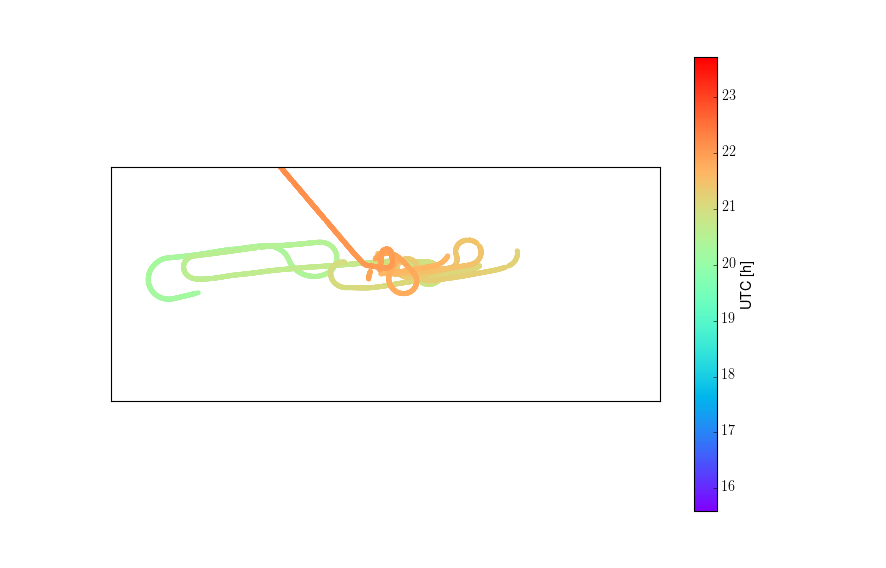

In [27]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-100,15],upper_right=[-85,32],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_cld['Longitude'],istar_cld['Latitude'],marker='o',latlon=True,
               c=istar_cld['Start_UTC'],s=20,cmap=plt.cm.rainbow,edgecolor='none')
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')

In [30]:
it = (istar_cld['Start_UTC']>19)&(istar_cld['Start_UTC']<22)

<IPython.core.display.Javascript object>


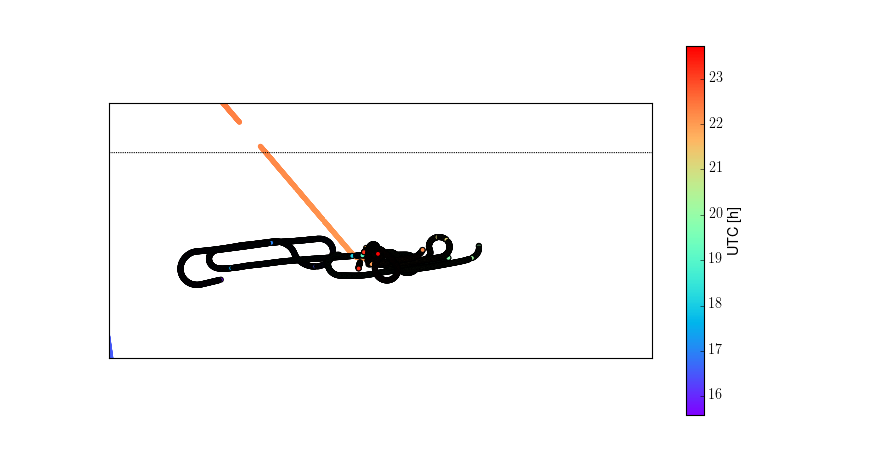

In [31]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-100,15],upper_right=[-85,32],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_cld['Longitude'],istar_cld['Latitude'],marker='o',latlon=True,
               c=istar_cld['Start_UTC'],s=20,cmap=plt.cm.rainbow,edgecolor='none')
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')
cs = m.scatter(istar_cld['Longitude'][it],istar_cld['Latitude'][it],marker='o',latlon=True,
               c=istar_cld['Start_UTC'][it],s=20,cmap=plt.cm.rainbow)

<IPython.core.display.Javascript object>


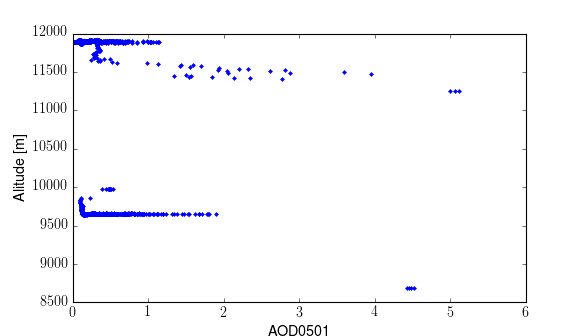

In [36]:
plt.figure()
ig = istar_cld['qual_flag'][it]==0
plt.plot(istar_cld['AOD0501'][it],istar_cld['GPS_alt'][it],'.')
plt.plot(istar_cld['AOD0501'][it][ig],istar_cld['GPS_alt'][it][ig],'xr')
plt.xlabel('AOD0501')
plt.ylabel('Alitude [m]')

<IPython.core.display.Javascript object>


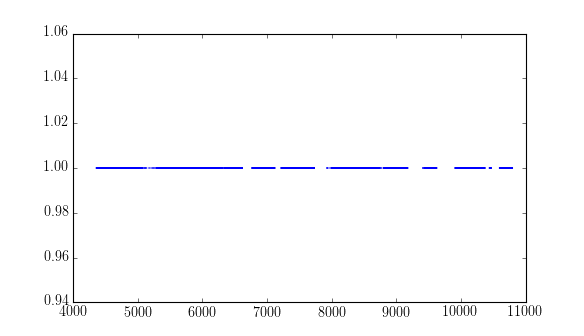

In [37]:
plt.figure()
plt.plot(istar_cld['qual_flag'][it])

## Check out the cld case #2

<IPython.core.display.Javascript object>


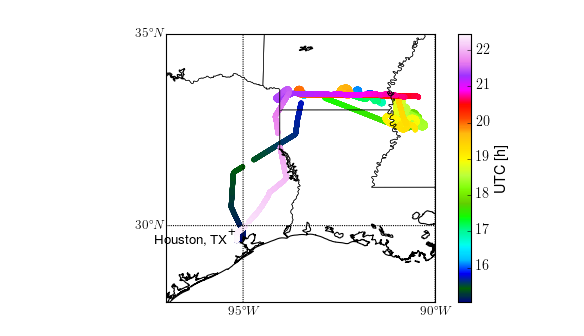

In [44]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-97,28],upper_right=[-90,35],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_cld2['Longitude'],istar_cld2['Latitude'],marker='o',latlon=True,
               c=istar_cld2['Start_UTC'],s=20,cmap=plt.cm.gist_ncar,edgecolor='none')
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')

In [48]:
it = (istar_cld2['Start_UTC']>17)&(istar_cld2['Start_UTC']<20.5)

<IPython.core.display.Javascript object>


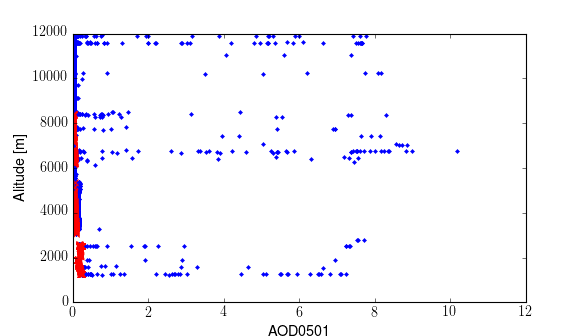

In [49]:
plt.figure()
ig2 = istar_cld2['qual_flag'][it]==0
plt.plot(istar_cld2['AOD0501'][it],istar_cld2['GPS_alt'][it],'.')
plt.plot(istar_cld2['AOD0501'][it][ig2],istar_cld2['GPS_alt'][it][ig2],'xr')
plt.xlabel('AOD0501')
plt.ylabel('Alitude [m]')

<IPython.core.display.Javascript object>


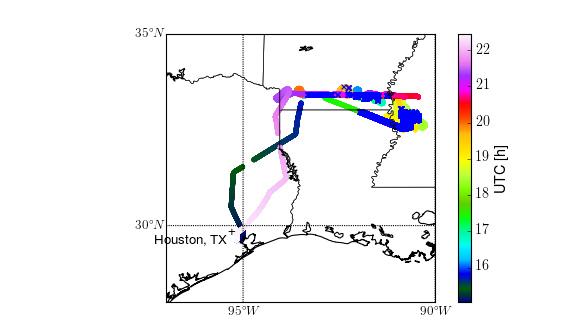

In [52]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-97,28],upper_right=[-90,35],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_cld2['Longitude'],istar_cld2['Latitude'],marker='o',latlon=True,
               c=istar_cld2['Start_UTC'],s=20,cmap=plt.cm.gist_ncar,edgecolor='none')
m.scatter(istar_cld2['Longitude'][it][ig2],istar_cld2['Latitude'][it][ig2],marker='x',latlon=True,s=20)
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')

<IPython.core.display.Javascript object>


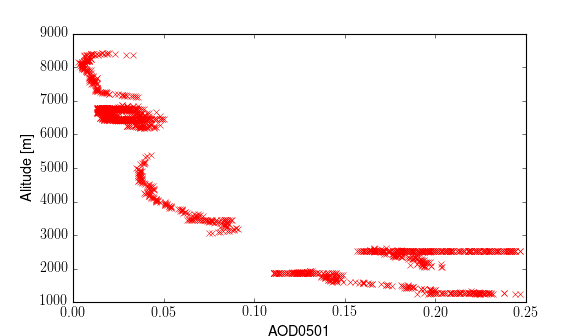

In [53]:
plt.figure()
ig2 = istar_cld2['qual_flag'][it]==0
plt.plot(istar_cld2['AOD0501'][it][ig2],istar_cld2['GPS_alt'][it][ig2],'xr')
plt.xlabel('AOD0501')
plt.ylabel('Alitude [m]')

In [54]:
alt = istar_cld2['GPS_alt'][it][ig2]
aod = istar_cld2['AOD0501'][it][ig2]

<IPython.core.display.Javascript object>


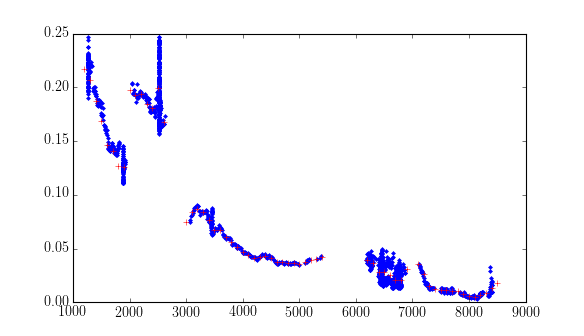

In [71]:
plt.figure()
plt.plot(alt,aod,'.')
plt.plot(bins,results,'+r')

In [213]:
from Sp_parameters import ext_prof,smooth

In [210]:
ext,bins = ext_prof(istar_cld2['GPS_alt'][it][ig2],istar_cld2['AOD0501'][it][ig2],binsize=50,verbose=True)

range: [1210.0, 8460.0]
nbins: 146


<IPython.core.display.Javascript object>


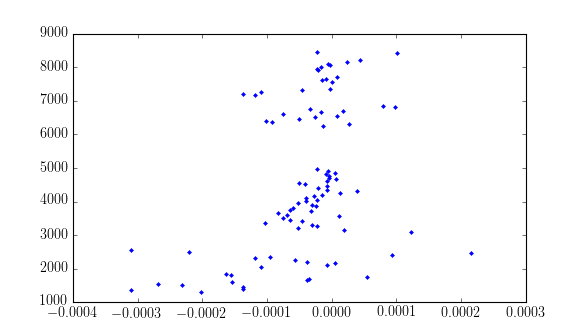

In [219]:
plt.figure()
plt.plot(ext,bins,'.')

## Plot figure for the CA Valley case

<IPython.core.display.Javascript object>


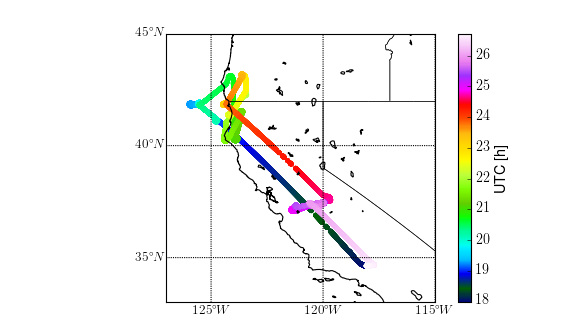

In [225]:
fig,ax = plt.subplots(1,1)
m = mi.build_basemap(lower_left=[-127,33],upper_right=[-115,45],ax=ax)
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
cs = m.scatter(istar_val['Longitude'],istar_val['Latitude'],marker='o',latlon=True,
               c=istar_val['Start_UTC'],s=20,cmap=plt.cm.gist_ncar,edgecolor='none')
#m.scatter(istar_cld2['Longitude'][it][ig2],istar_cld2['Latitude'][it][ig2],marker='x',latlon=True,s=20)
cb = plt.colorbar(cs)
cb.set_label('UTC [h]')